# Project: Melbourne house pricing prediction


# Preliminaries
## Imports and Configuration


In [1]:
import os
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from IPython.display import display
from pandas.api.types import CategoricalDtype

from category_encoders import MEstimateEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


In [2]:
# Mute warnings
warnings.filterwarnings('ignore')

In [3]:
raw_data = pd.read_csv("Melbourne_housing_FULL.csv", sep = ",")

In [4]:
data = raw_data

# EDA (EXPLORATORY DATA ANALYSIS)

## Non-graphical Analysis

In [5]:
data.shape

(34857, 21)

In [6]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [7]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [8]:
data[{'Rooms','Bedroom2','Bathroom'}].head()

,Bedroom2,Rooms,Bathroom
0,2.0,2,1.0
1,2.0,2,1.0
2,2.0,2,1.0
3,3.0,3,2.0
4,3.0,3,2.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [10]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data['DayOfWeek'] = data['Date'].dt.day_name()
data['DayOfMonth'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

# Drop 'Date' column
data = data.drop(columns='Date')

In [12]:
# From 'YearBuilt'calculate 'Age' of house
data['Age'] = 2021 - data['YearBuilt']

# Drop 'YearBuilt' column
data = data.drop(columns='YearBuilt')

In [13]:
data.Postcode = data.Postcode.astype('object')
data.DayOfMonth = data.DayOfMonth.astype('object')
data.Month = data.Month.astype('object')
data.Year = data.Year.astype('object')

In [14]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,DayOfWeek,DayOfMonth,Month,Year,Age
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2.5,3067,2.0,...,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Wednesday,9,3,2016,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067,2.0,...,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,Saturday,12,3,2016,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067,2.0,...,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,Saturday,2,4,2016,121.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2.5,3067,3.0,...,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,Saturday,2,4,2016,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067,3.0,...,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,Monday,3,4,2017,121.0


In [15]:
data.describe(percentiles=[.01, .1, .25, .5, .75, .9, .99])

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Age
count,34857.000000,2.724700e+04,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,26881.000000,26881.000000,34854.000000,15551.000000
mean,3.031012,1.050173e+06,11.184929,3.084647,1.624798,1.728845,593.598993,160.25640,-37.810634,145.001851,7572.888306,55.710115
std,0.969933,6.414671e+05,6.788892,0.980690,0.724212,1.010771,3398.841946,401.26706,0.090279,0.120169,4428.090313,37.328178
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-38.190430,144.423790,83.000000,-85.000000
1%,1.000000,3.100000e+05,1.600000,1.000000,1.000000,0.000000,0.000000,4.00000,-38.079456,144.641662,881.190000,5.000000
10%,2.000000,4.853000e+05,3.800000,2.000000,1.000000,1.000000,0.000000,73.00000,-37.919200,144.868480,2674.000000,11.000000
25%,2.000000,6.350000e+05,6.400000,2.000000,1.000000,1.000000,224.000000,102.00000,-37.862950,144.933500,4385.000000,21.000000
50%,3.000000,8.700000e+05,10.300000,3.000000,2.000000,2.000000,521.000000,136.00000,-37.807600,145.007800,6763.000000,51.000000
75%,4.000000,1.295000e+06,14.000000,4.000000,2.000000,2.000000,670.000000,188.00000,-37.754100,145.071900,10412.000000,81.000000
90%,4.000000,1.800000e+06,19.900000,4.000000,2.000000,3.000000,824.000000,258.00000,-37.706800,145.136680,14577.000000,111.000000


In [16]:
data.describe(include = 'O')

,Suburb,Address,Type,Method,SellerG,Postcode,CouncilArea,Regionname,DayOfWeek,DayOfMonth,Month,Year
count,34857,34857,34857,34857,34857,34856.0,34854,34854,34857,34857,34857,34857
unique,351,34009,3,9,388,211.0,33,8,7,30,12,3
top,Reservoir,5 Charles St,h,S,Jellis,3073.0,Boroondara City Council,Southern Metropolitan,Saturday,17,3,2017
freq,844,6,23980,19744,3359,844.0,3675,11836,22490,2496,4507,19852


## Univariate Anaysis

In [17]:
num_col = ['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Lattitude', 'Longtitude', 'Propertycount']

Text(0.5, 0.98, 'Unvariate numerical Plotting')

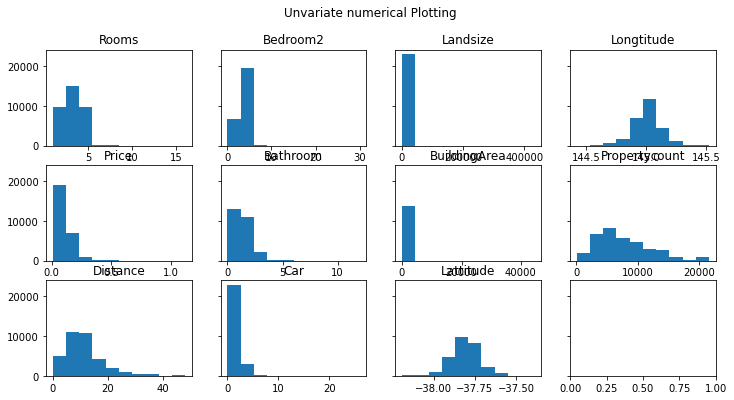

In [18]:
fig, axs = plt.subplots(3, 4, figsize=(12, 6), sharey=True)
axs[0, 0].hist(data['Rooms'])
axs[0, 0].set_title('Rooms')

axs[1, 0].hist(data['Price'])
axs[1, 0].set_title('Price')

axs[2, 0].hist(data['Distance'])
axs[2, 0].set_title('Distance')

axs[0, 1].hist(data['Bedroom2'])
axs[0, 1].set_title('Bedroom2')

axs[1, 1].hist(data['Bathroom'])
axs[1, 1].set_title('Bathroom')

axs[2, 1].hist(data['Car'])
axs[2, 1].set_title('Car')

axs[0, 2].hist(data['Landsize'])
axs[0, 2].set_title('Landsize')

axs[1, 2].hist(data['BuildingArea'])
axs[1, 2].set_title('BuildingArea')

axs[2, 2].hist(data['Lattitude'])
axs[2, 2].set_title('Lattitude')

axs[0, 3].hist(data['Longtitude'])
axs[0, 3].set_title('Longtitude')

axs[1, 3].hist(data['Propertycount'])
axs[1, 3].set_title('Propertycount')

fig.suptitle('Unvariate numerical Plotting')

<Figure size 1152x504 with 0 Axes>

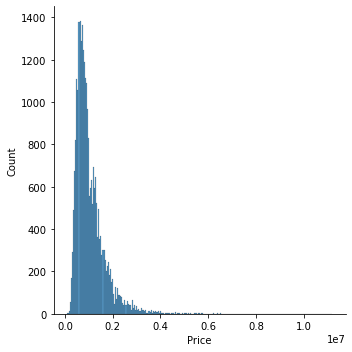

In [19]:
plt.figure(figsize = (16,7))
sns.displot(data['Price'], kde=False)

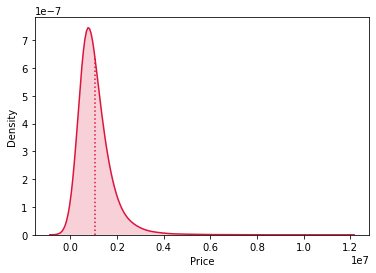

In [20]:
ax = sns.kdeplot(data['Price'], bw=0.5, shade=False, color='crimson')
kdeline = ax.lines[0]
mean = data['Price'].mean()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
ax.vlines(mean,0,height,color='crimson',ls=':')
ax.fill_between(xs,0,ys,facecolor='crimson',alpha=0.2)

In [21]:
# Categorical variables:
cat_col = data.select_dtypes(include=['object'])
cat_va = cat_col.columns


<AxesSubplot:xlabel='Suburb', ylabel='count'>

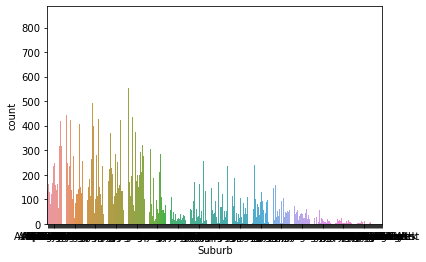

In [22]:
sns.countplot(x='Suburb', data=data)

In [23]:
#sns.countplot(x='Address', data=data)

<AxesSubplot:xlabel='Type', ylabel='count'>

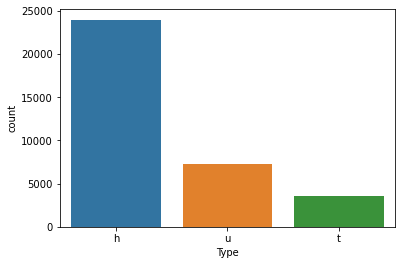

In [24]:
sns.countplot(x='Type', data=data)

<AxesSubplot:xlabel='Method', ylabel='count'>

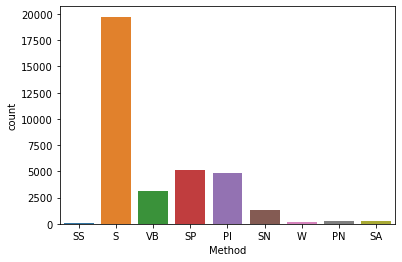

In [25]:
sns.countplot(x='Method', data=data)

<AxesSubplot:xlabel='SellerG', ylabel='count'>

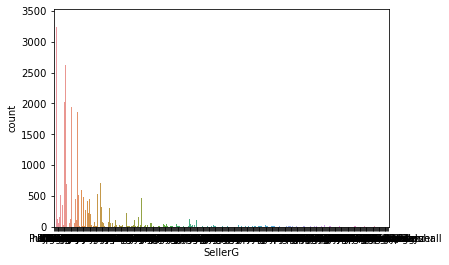

In [26]:
sns.countplot(x ='SellerG', data=data)

<AxesSubplot:xlabel='Postcode', ylabel='count'>

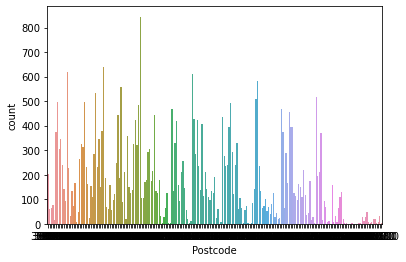

In [27]:
sns.countplot(x ='Postcode', data=data)

<AxesSubplot:xlabel='count', ylabel='Regionname'>

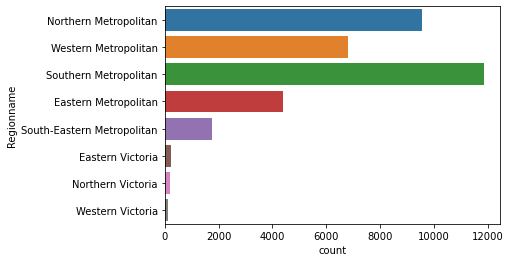

In [28]:
sns.countplot(y='Regionname', data=data)

In [29]:
# multiple plots
northern_metropolitan = data['Price'].loc[data['Regionname']=='Northern Metropolitan'].values
souththern_metropolitan = data['Price'].loc[data['Regionname']=='Southern Metropolitan'].values
eastern_metropolitan = data['Price'].loc[data['Regionname']=='Eastern Metropolitan'].values
western_metropolitan = data['Price'].loc[data['Regionname']=='Western Metropolitan'].values
southeastern_metropolitan = data['Price'].loc[data['Regionname']=='South-Eastern Metropolitan']
northern_victoria = data['Price'].loc[data['Regionname']=='Northern Victoria'].values
eastern_victoria = data['Price'].loc[data['Regionname']=='Eastern Victoria'].values
western_victoria = data['Price'].loc[data['Regionname']=='Western Victoria'].values

Text(0.5, 1.0, 'Distribution of housing price in western victoria area')

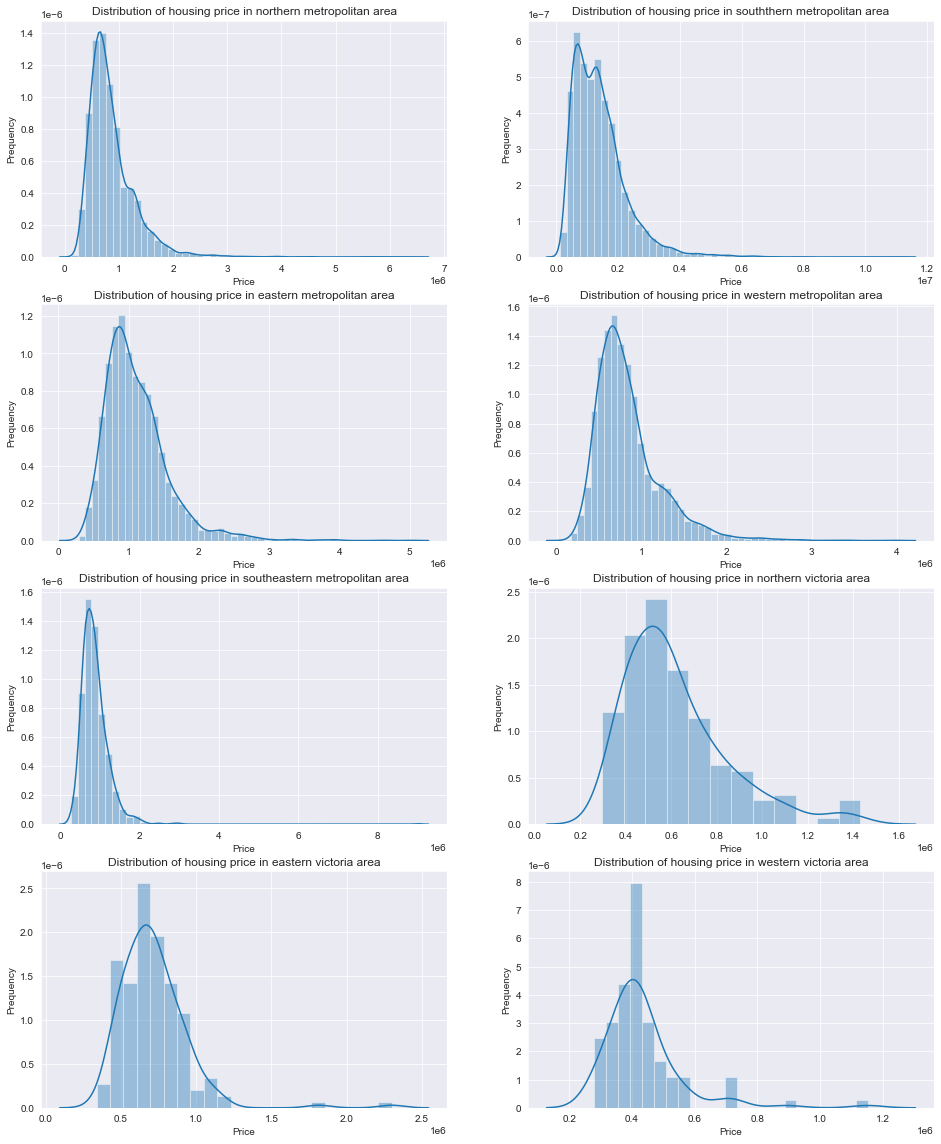

In [30]:
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2,figsize = (16,20))

#plot [0,0]
sns.distplot(northern_metropolitan, ax=axes[0,0])
axes[0,0].set_xlabel('Price')
axes[0,0].set_ylabel('Prequency')
axes[0,0].set_title('Distribution of housing price in northern metropolitan area')

#plot [0,1]
sns.distplot(souththern_metropolitan, ax=axes[0,1])
axes[0,1].set_xlabel('Price')
axes[0,1].set_ylabel('Prequency')
axes[0,1].set_title('Distribution of housing price in souththern metropolitan area')

#plot [1,0]
sns.distplot(eastern_metropolitan, ax=axes[1,0])
axes[1,0].set_xlabel('Price')
axes[1,0].set_ylabel('Prequency')
axes[1,0].set_title('Distribution of housing price in eastern metropolitan area')

#plot [1,1]
sns.distplot(western_metropolitan, ax=axes[1,1])
axes[1,1].set_xlabel('Price')
axes[1,1].set_ylabel('Prequency')
axes[1,1].set_title('Distribution of housing price in western metropolitan area')

#plot [2,0]
sns.distplot(southeastern_metropolitan, ax=axes[2,0])
axes[2,0].set_xlabel('Price')
axes[2,0].set_ylabel('Prequency')
axes[2,0].set_title('Distribution of housing price in southeastern metropolitan area')

#plot [2,1]
sns.distplot(northern_victoria, ax=axes[2,1])
axes[2,1].set_xlabel('Price')
axes[2,1].set_ylabel('Prequency')
axes[2,1].set_title('Distribution of housing price in northern victoria area')

#plot [3,0]
sns.distplot(eastern_victoria, ax=axes[3,0])
axes[3,0].set_xlabel('Price')
axes[3,0].set_ylabel('Prequency')
axes[3,0].set_title('Distribution of housing price in eastern victoria area')

#plot [3,1]
sns.distplot(western_victoria, ax=axes[3,1])
axes[3,1].set_xlabel('Price')
axes[3,1].set_ylabel('Prequency')
axes[3,1].set_title('Distribution of housing price in western victoria area')

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

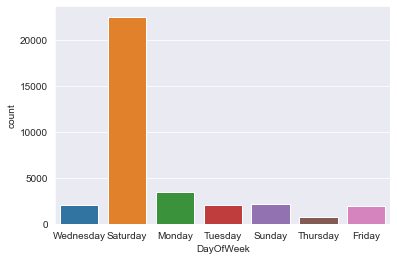

In [31]:
sns.countplot(x='DayOfWeek', data=data)

<AxesSubplot:xlabel='DayOfMonth', ylabel='count'>

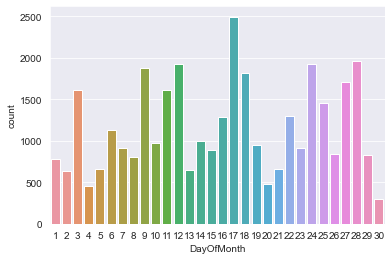

In [32]:
sns.countplot(x='DayOfMonth', data=data)

<AxesSubplot:xlabel='Month', ylabel='count'>

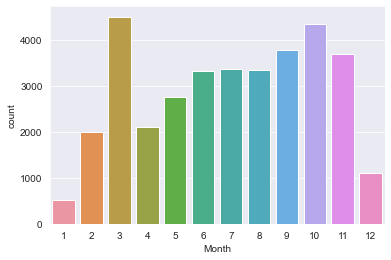

In [33]:
sns.countplot(x='Month', data=data)

<AxesSubplot:xlabel='Year', ylabel='count'>

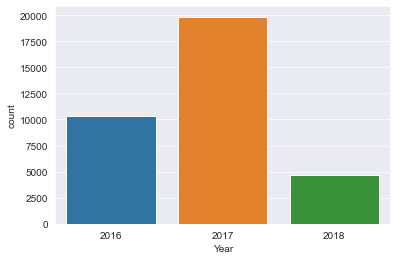

In [34]:
sns.countplot(x='Year', data=data)

 ## Bivariate analysis

### Numerical vs. Numerical

<AxesSubplot:xlabel='Rooms', ylabel='Price'>

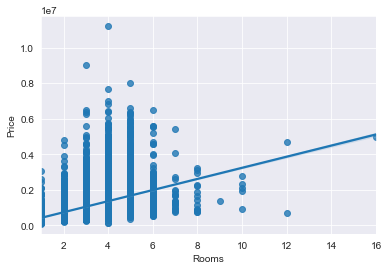

In [35]:
sns.regplot(x='Rooms',y='Price',data=data)

- Realise that outliers are those houses have room > 8 => remove
- Those houses have price > 8.000.000 => replace by upper value

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

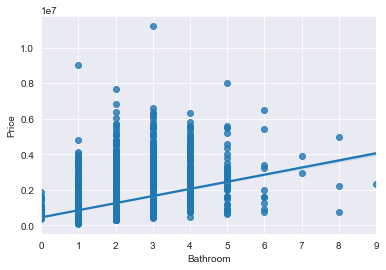

In [36]:
sns.regplot(x='Bathroom',y='Price',data=data)

- Realise that outliers are those houses have bathroom > 6 => remove
- Those houses have price > 8.000.000 => replace by upper value

<AxesSubplot:xlabel='Bedroom2', ylabel='Price'>

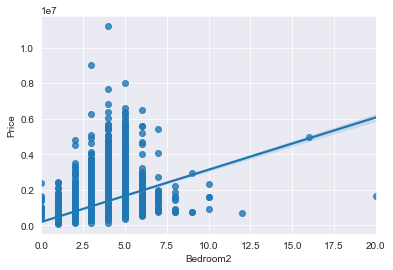

In [37]:
sns.regplot(x='Bedroom2',y='Price',data=data)

<AxesSubplot:xlabel='Bedroom2', ylabel='Rooms'>

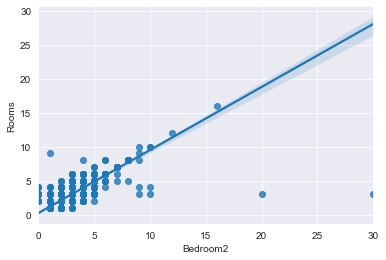

In [38]:
sns.regplot(x='Bedroom2',y='Rooms',data=data)

=> Room and bedroom2 are high correlation => remove 'Bedroom2'

<AxesSubplot:xlabel='Distance', ylabel='Price'>

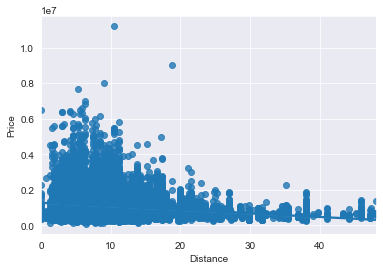

In [39]:
sns.regplot(x='Distance',y='Price',data=data)

- Realise that outliers are those houses have cars > 8 => remove
- Those houses have price > upper_value => replace by upper value

<AxesSubplot:xlabel='Car', ylabel='Price'>

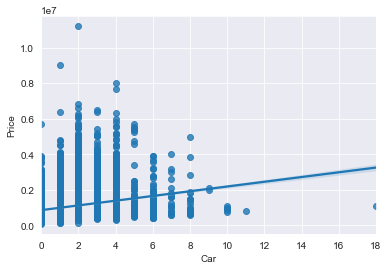

In [40]:
sns.regplot(x='Car',y='Price',data=data)

=> Replace outliers by upper_value

<AxesSubplot:xlabel='Landsize', ylabel='Price'>

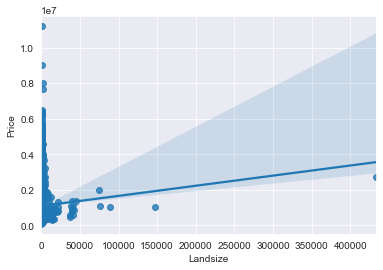

In [41]:
sns.regplot(x='Landsize',y='Price',data=data)

- Replace outliers by upper_value
- Realise that Landsize has correlation with price => replace null value by mean

<AxesSubplot:xlabel='Age', ylabel='Price'>

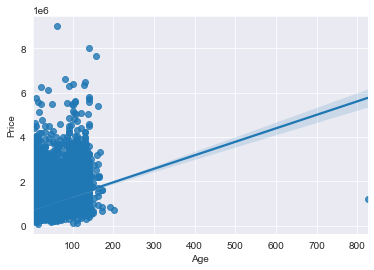

In [42]:
sns.regplot(x='Age',y='Price',data=data)

- Replace outliers by upper_value
- Realise that Yearbuilt has correlation with price => replace null value by mean

<AxesSubplot:xlabel='Propertycount', ylabel='Price'>

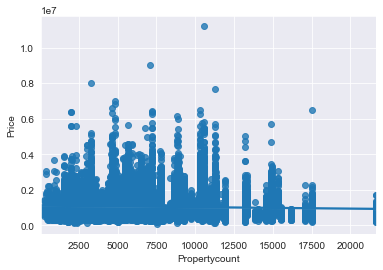

In [43]:
sns.regplot(x='Propertycount',y='Price',data=data)

- Realise that Property hasn't correlation with price => drop 'Propertycount'

<AxesSubplot:xlabel='Lattitude', ylabel='Price'>

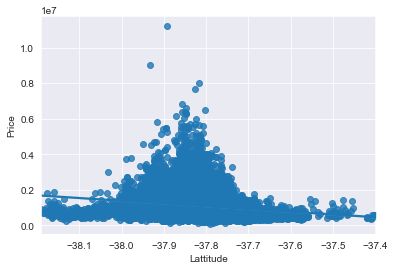

In [44]:
sns.regplot(x='Lattitude',y='Price',data=data)

<AxesSubplot:xlabel='Longtitude', ylabel='Price'>

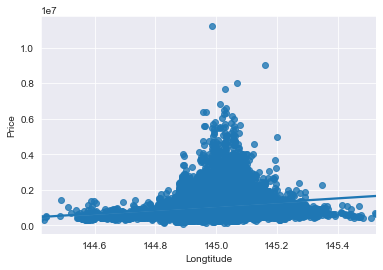

In [45]:
sns.regplot(x='Longtitude',y='Price',data=data)

<AxesSubplot:xlabel='Lattitude', ylabel='Distance'>

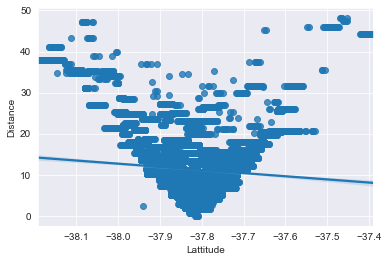

In [46]:
# Check Correlation between 'Distance' and 'Lattitude'
sns.regplot(x='Lattitude',y='Distance',data=data)

<AxesSubplot:xlabel='Longtitude', ylabel='Distance'>

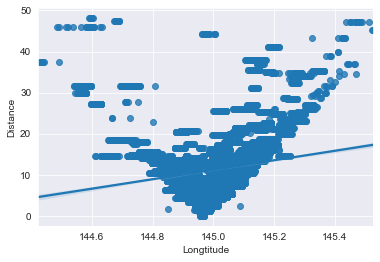

In [47]:
# Check Correlation between 'Distance' and 'Longtitude'
sns.regplot(x='Longtitude',y='Distance',data=data)

<AxesSubplot:xlabel='BuildingArea', ylabel='Price'>

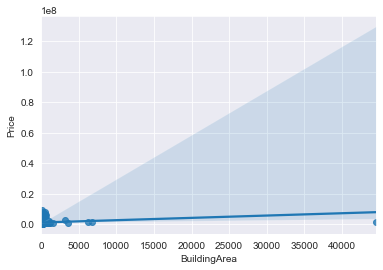

In [48]:
sns.regplot(x='BuildingArea',y='Price',data=data)

### Categorical vs. categorical

In [49]:
#Categorical Variables:
cat_va 

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Postcode',
       'CouncilArea', 'Regionname', 'DayOfWeek', 'DayOfMonth', 'Month',
       'Year'],
      dtype='object')

<AxesSubplot:xlabel='Month', ylabel='count'>

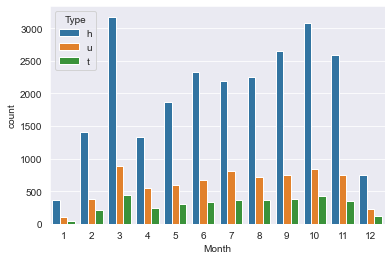

In [50]:
sns.countplot(x='Month', hue = 'Type', data=data)


<AxesSubplot:xlabel='Method', ylabel='count'>

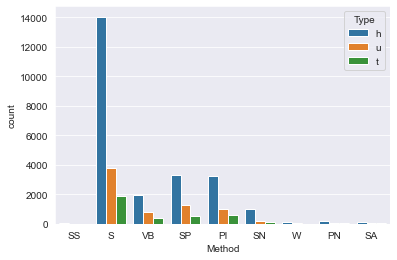

In [51]:
sns.countplot(x='Method', hue = 'Type', data=data)

<AxesSubplot:xlabel='DayOfWeek', ylabel='count'>

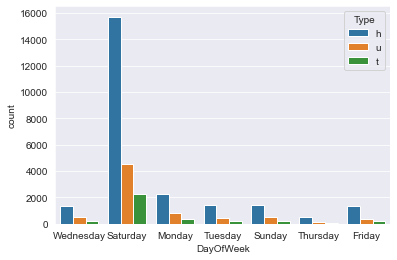

In [52]:
sns.countplot(x='DayOfWeek', hue = 'Type', data=data)

<AxesSubplot:xlabel='Year', ylabel='count'>

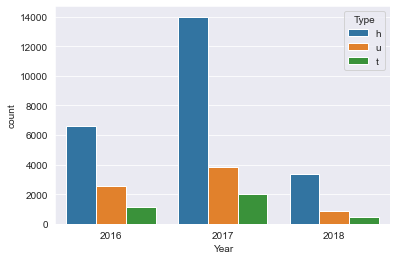

In [53]:
sns.countplot(x='Year', hue = 'Type', data=data)

<AxesSubplot:xlabel='Year', ylabel='count'>

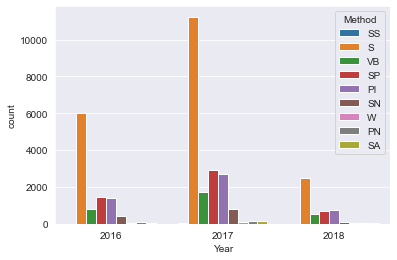

In [54]:
sns.countplot(x='Year', hue = 'Method', data=data)

<AxesSubplot:xlabel='Month', ylabel='count'>

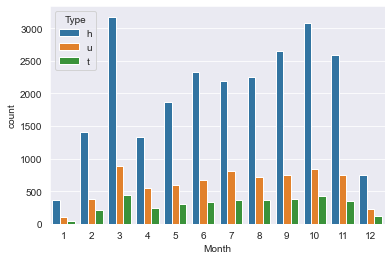

In [55]:
sns.countplot(x='Month', hue = 'Type', data=data)

<AxesSubplot:xlabel='count', ylabel='Month'>

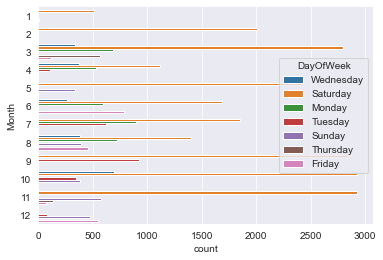

In [56]:
sns.countplot(y='Month', hue = 'DayOfWeek', data=data)

<AxesSubplot:xlabel='Month', ylabel='count'>

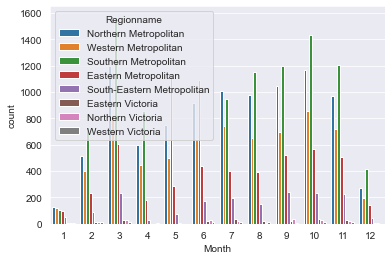

In [57]:
sns.countplot(x='Month', hue = 'Regionname', data=data)

<AxesSubplot:xlabel='count', ylabel='Regionname'>

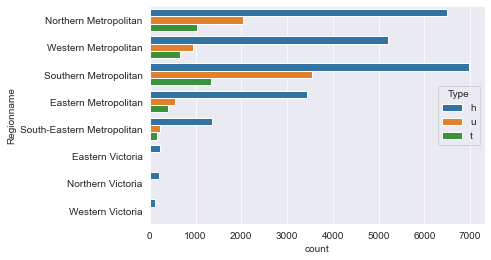

In [58]:
sns.countplot(y='Regionname', hue = 'Type', data=data)

<AxesSubplot:xlabel='count', ylabel='Regionname'>

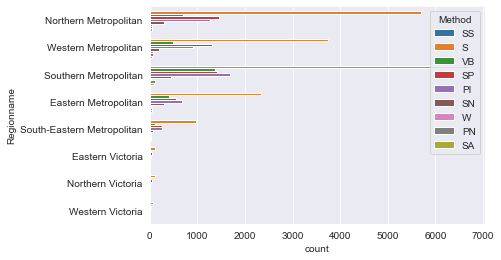

In [59]:
sns.countplot(y='Regionname', hue = 'Method', data=data)

### Categorical vs. numerical

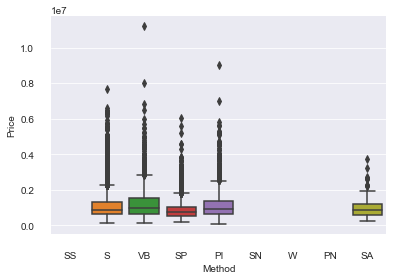

In [60]:
sns.boxplot(y='Price', x="Method",data=data)
sns.despine(offset=10, trim=True)

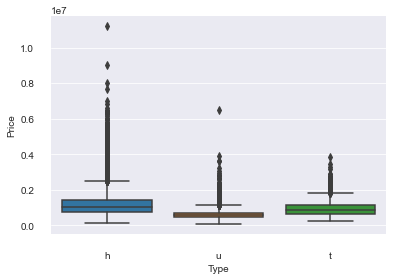

In [61]:
sns.boxplot(y='Price', x="Type",data=data)
sns.despine(offset=10, trim=True)

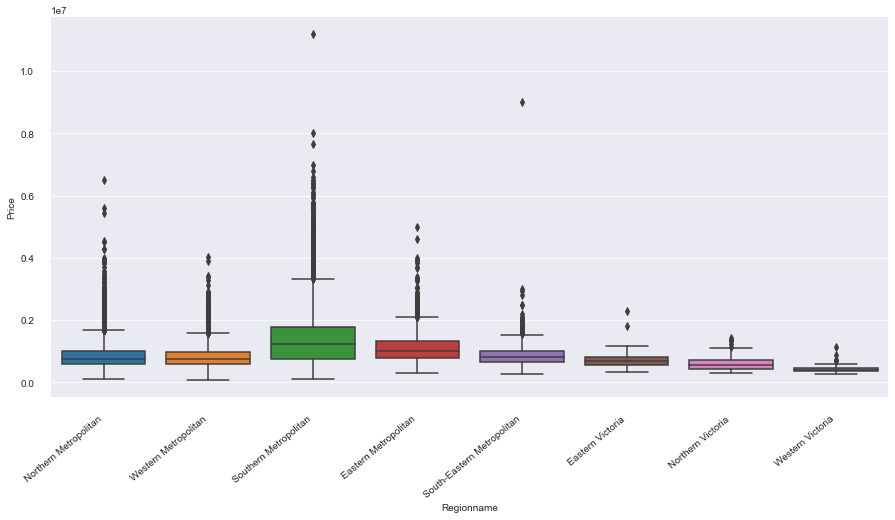

In [62]:
f, ax = plt.subplots(figsize=(15, 7))
sns.despine(f, offset =10)
ax = sns.boxplot(y='Price', x="Regionname",data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

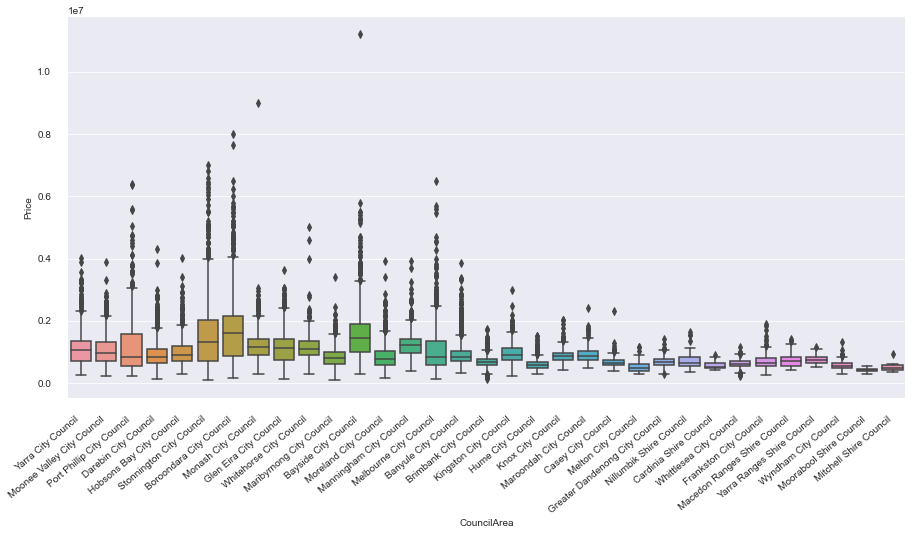

In [63]:
f, ax = plt.subplots(figsize=(15, 7))
sns.despine(f, offset =10)
ax = sns.boxplot(y='Price', x="CouncilArea",data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()



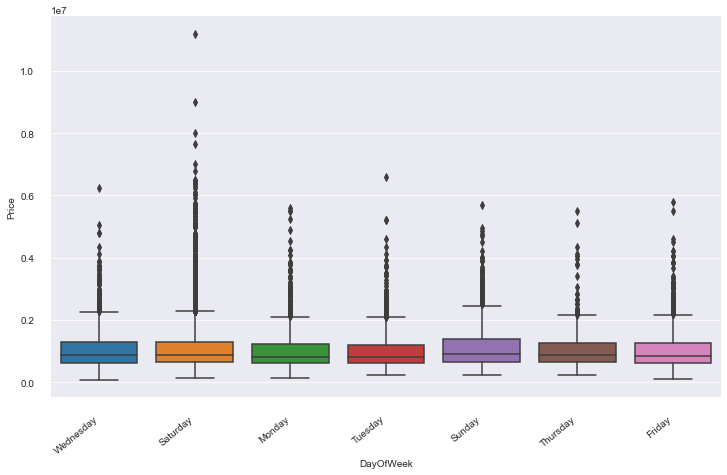

In [64]:
f, ax = plt.subplots(figsize=(12, 7))
sns.despine(f, offset =10)
ax = sns.boxplot(y='Price', x="DayOfWeek",data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

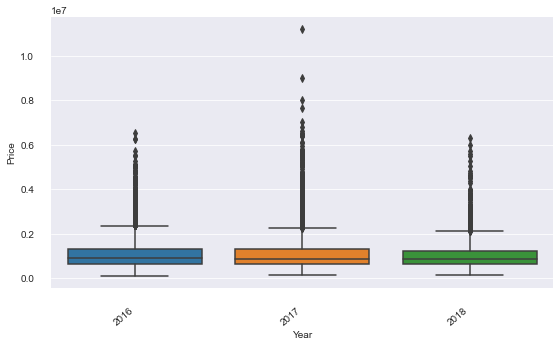

In [65]:
f, ax = plt.subplots(figsize=(9, 5))
sns.despine(f, offset =10)
ax = sns.boxplot(y='Price', x="Year",data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

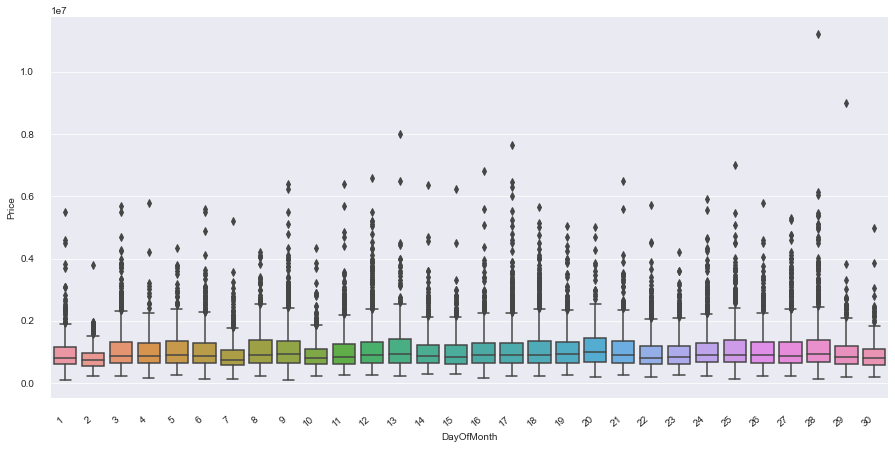

In [66]:
f, ax = plt.subplots(figsize=(15, 7))
sns.despine(f, offset =10)
ax = sns.boxplot(y='Price', x="DayOfMonth",data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()



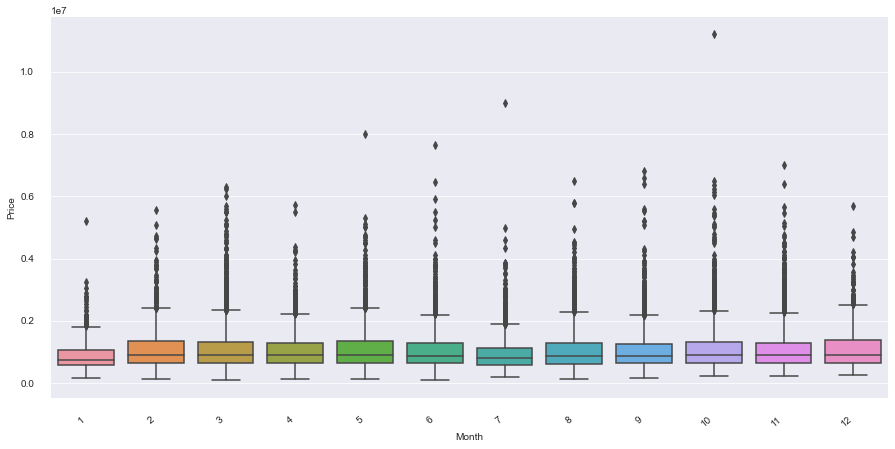

In [67]:
f, ax = plt.subplots(figsize=(15, 7))
sns.despine(f, offset =10)
ax = sns.boxplot(y='Price', x="Month",data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

## Multivariate analysis

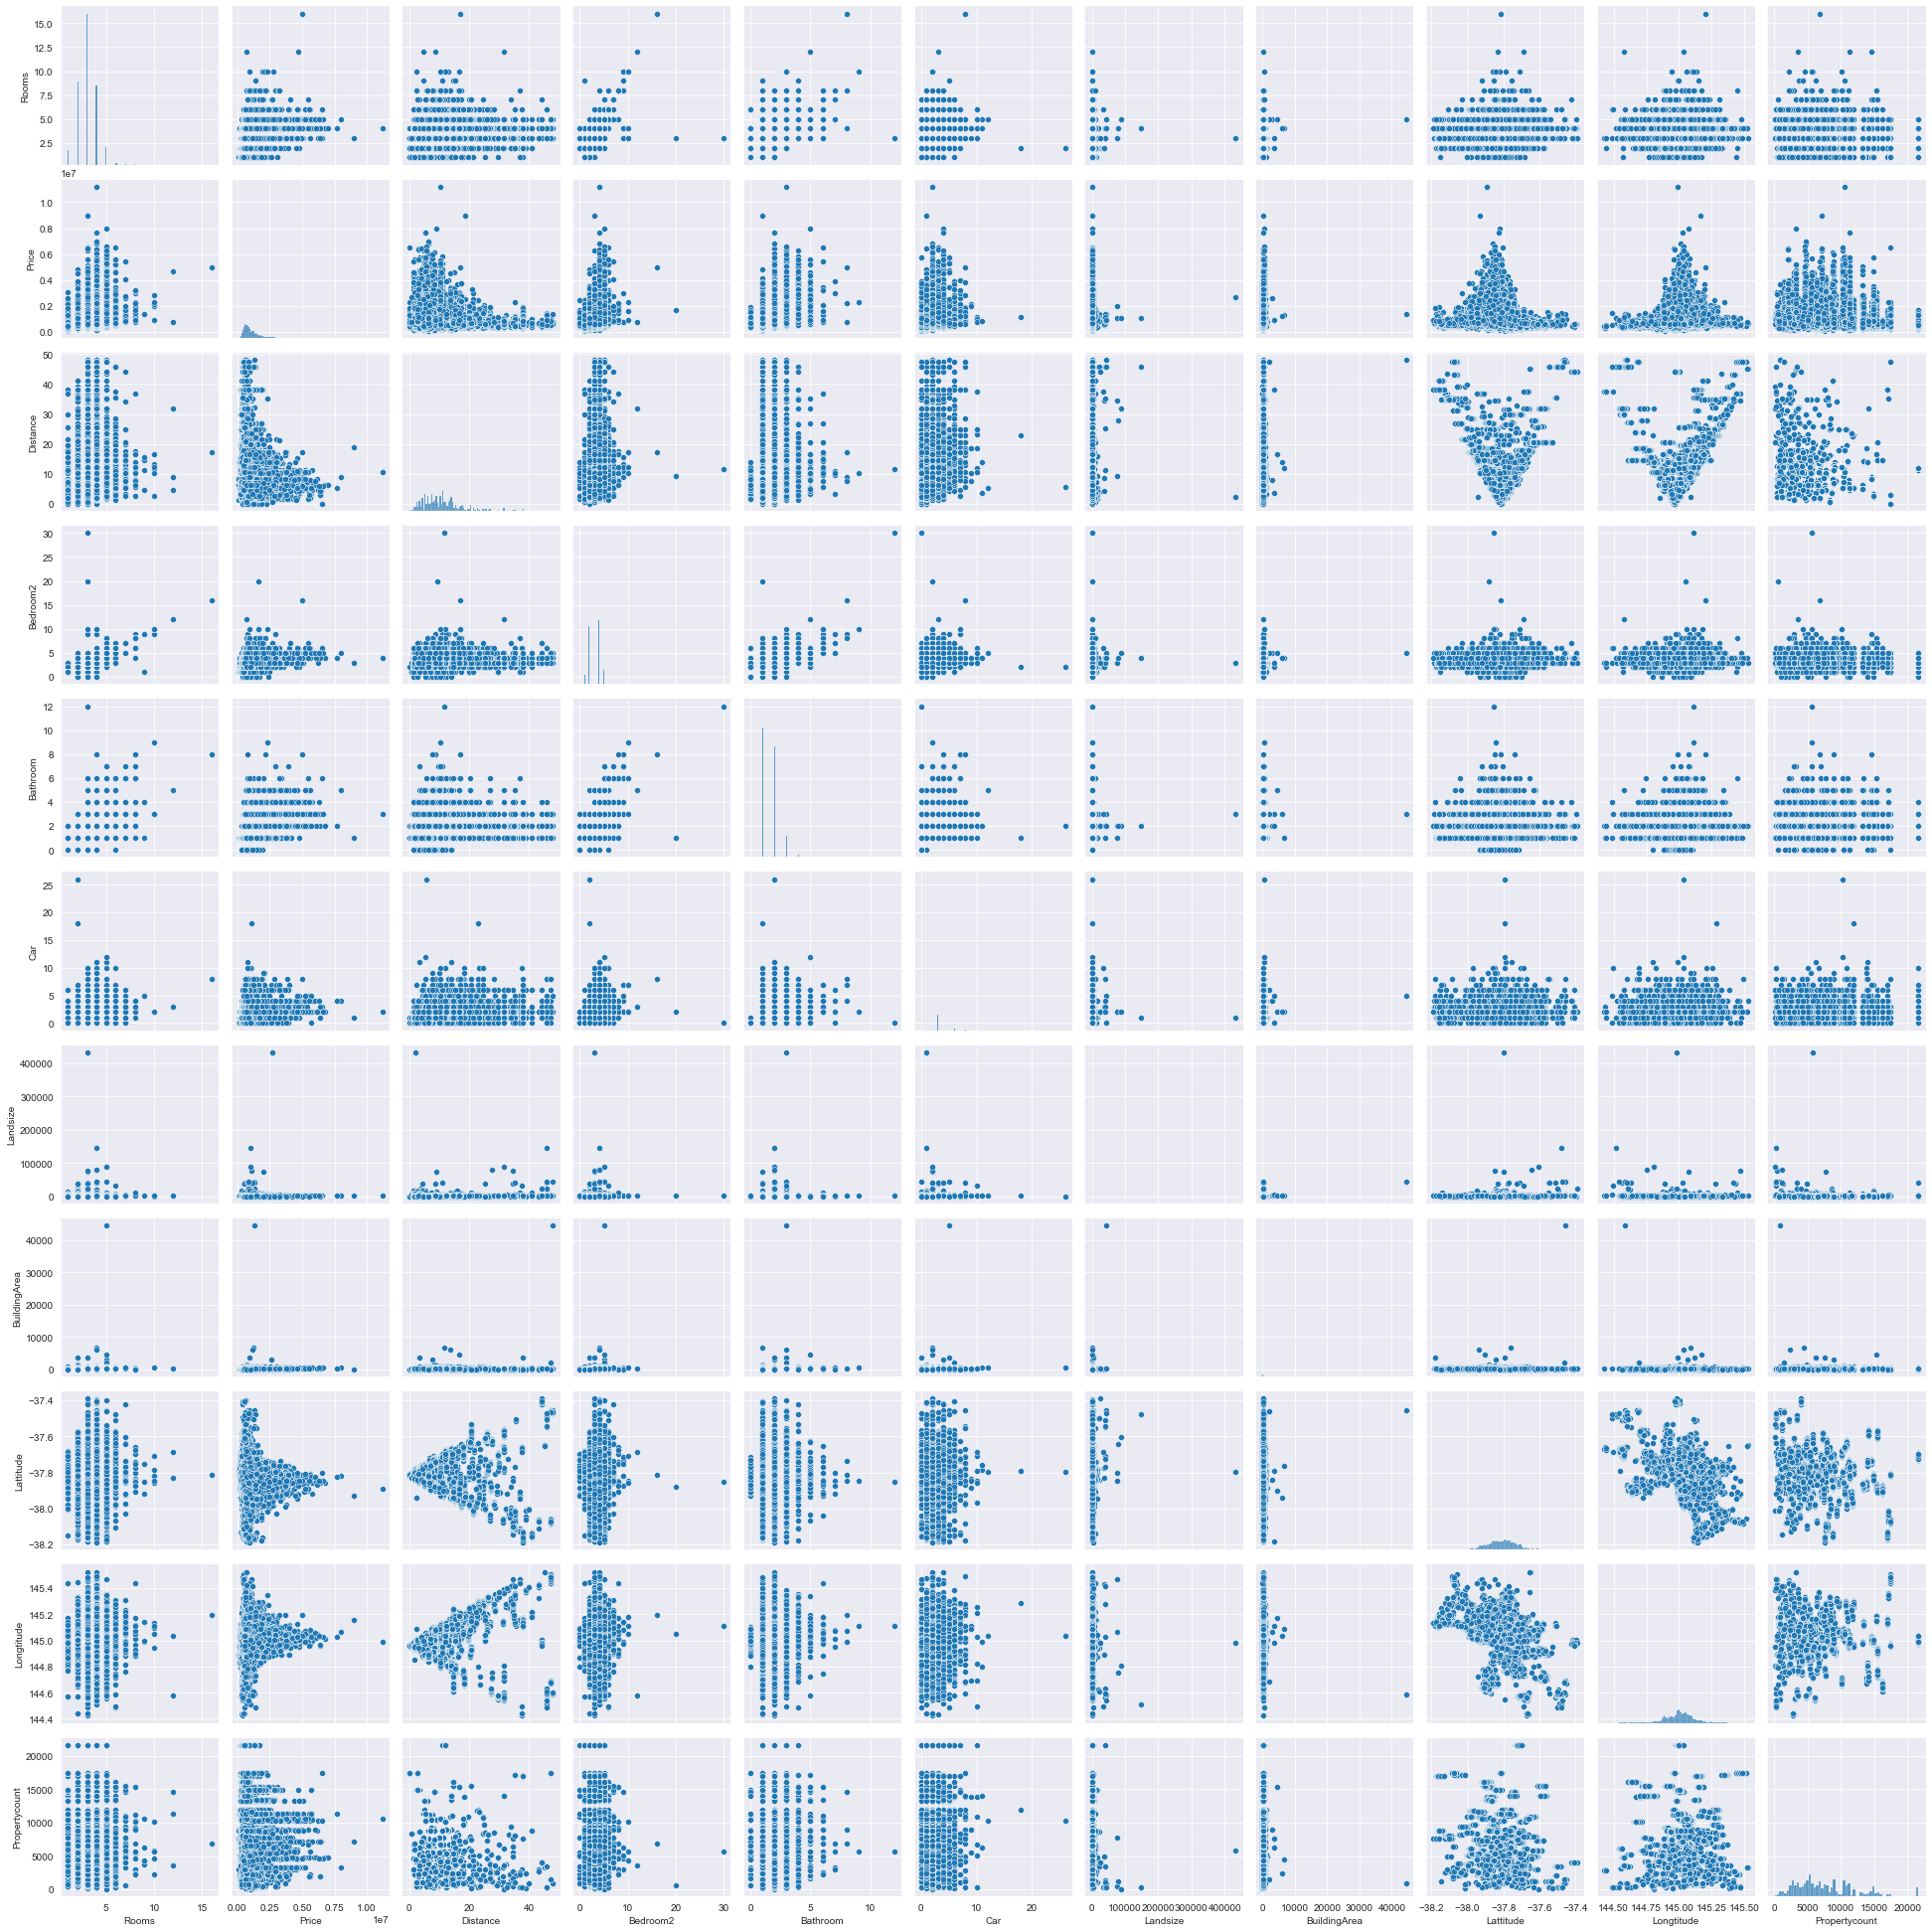

In [68]:
sns.pairplot(data[num_col])

<AxesSubplot:>

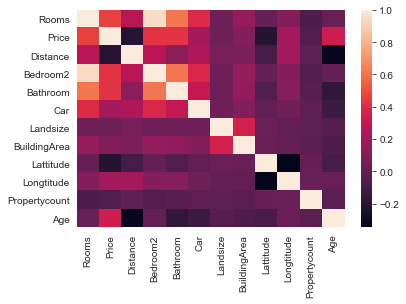

In [69]:
# Correlation matrix
sns.heatmap(data.corr())

=> Remove Distance and Lattitude, Bedroom2

# DATA CLEANING

## Check duplicated values and remove them

In [70]:
#Checking duplicates
data.duplicated().sum()

1

In [71]:
#Remove duplicated value
data.drop_duplicates(inplace = True)

In [72]:
data.shape

(34856, 24)

## Processing outliers

In [73]:
# Price
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)

IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in data.Price:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('number of outlier in the dataset is', len(outlier))

Interquartile range is 660000.0
low_limit is -355000.0
up_limit is 2285000.0
number of outlier in the dataset is 1278


In [74]:
# Drop outliers
out = data[(data['Price'] < low_lim)|(data['Price']>up_lim)].index
data.drop(out,inplace = True)

In [75]:
data.shape

(33578, 24)

In [76]:
# Rooms
Q1_rooms = data['Rooms'].quantile(0.25)
Q3_rooms = data['Rooms'].quantile(0.75)

IQR_rooms = Q3_rooms - Q1_rooms
print('Interquartile range is', IQR_rooms)
low_lim_rooms = Q1_rooms - 1.5 * IQR_rooms
up_lim_rooms = Q3_rooms + 1.5 * IQR_rooms
print('low_limit is', low_lim_rooms)
print('up_limit is', up_lim_rooms)
outlier_rooms =[]
for x in data.Rooms:
    if ((x> up_lim_rooms) or (x<low_lim_rooms)):
         outlier_rooms.append(x)
print('number of outlier in the dataset is', len(outlier_rooms))

Interquartile range is 2.0
low_limit is -1.0
up_limit is 7.0
number of outlier in the dataset is 26


In [77]:
# Drop outliers
out_rooms = data[(data['Rooms'] < low_lim_rooms)|(data['Rooms']>up_lim_rooms)].index
data.drop(out_rooms,inplace = True)

In [78]:
data.shape

(33552, 24)

In [79]:
# Bathroom
Q1_Bathroom = data['Bathroom'].quantile(0.25)
Q3_Bathroom = data['Bathroom'].quantile(0.75)

IQR_Bathroom = Q3_Bathroom - Q1_Bathroom
print('Interquartile range is', IQR_Bathroom)
low_lim_Bathroom = Q1_Bathroom - 1.5 * IQR_Bathroom
up_lim_Bathroom = Q3_Bathroom + 1.5 * IQR_Bathroom
print('low_limit is', low_lim_Bathroom)
print('up_limit is', up_lim_Bathroom)
outlier_Bathroom =[]
for x in data.Bathroom:
    if ((x> up_lim_Bathroom) or (x<low_lim_Bathroom)):
         outlier_Bathroom.append(x)
print('number of outlier in the dataset is', len(outlier_Bathroom))

Interquartile range is 1.0
low_limit is -0.5
up_limit is 3.5
number of outlier in the dataset is 233


In [80]:
# Drop outliers of Bathroom
out_Bathroom = data[(data['Bathroom'] < low_lim_Bathroom)|(data['Bathroom']>up_lim_Bathroom)].index
data.drop(out_Bathroom,inplace = True)
data.shape

(33319, 24)

In [81]:
# Car
Q1_Car = data['Car'].quantile(0.25)
Q3_Car = data['Car'].quantile(0.75)

IQR_Car = Q3_Car - Q1_Car
print('Interquartile range is', IQR_Car)
low_lim_Car = Q1_Car - 1.5 * IQR_Car
up_lim_Car = Q3_Car + 1.5 * IQR_Car
print('low_limit is', low_lim_Car)
print('up_limit is', up_lim_Car)
outlier_Car =[]
for x in data.Car:
    if ((x> up_lim_Car) or (x<low_lim_Car)):
         outlier_Car.append(x)
print('number of outlier in the dataset is', len(outlier_Car))

Interquartile range is 1.0
low_limit is -0.5
up_limit is 3.5
number of outlier in the dataset is 1323


In [82]:
# Drop outliers of Car
out_Car = data[(data['Car'] < low_lim_Car)|(data['Car']>up_lim_Car)].index
data.drop(out_Car,inplace = True)
data.shape

(31996, 24)

In [83]:
# Age
Q1_Age = data['Age'].quantile(0.25)
Q3_Age = data['Age'].quantile(0.75)

IQR_Age = Q3_Age - Q1_Age
print('Interquartile range is', IQR_Age)
low_lim_Age = Q1_Age - 1.5 * IQR_Age
up_lim_Age = Q3_Age + 1.5 * IQR_Age
print('low_limit is', low_lim_Age)
print('up_limit is', up_lim_Age)
outlier_Age =[]
for x in data.Age:
    if ((x> up_lim_Age) or (x<low_lim_Age)):
         outlier_Age.append(x)
print('number of outlier in the dataset is', len(outlier_Age))

Interquartile range is 53.0
low_limit is -58.5
up_limit is 153.5
number of outlier in the dataset is 22


In [84]:
# Drop outliers of Age
out_Age = data[(data['Age'] < low_lim_Age)|(data['Age']>up_lim_Age)].index
data.drop(out_Age,inplace = True)
data.shape

(31974, 24)

In [85]:
# Landsize
Q1_Landsize = data['Landsize'].quantile(0.25)
Q3_Landsize = data['Landsize'].quantile(0.75)

IQR_Landsize = Q3_Landsize- Q1_Landsize
print('Interquartile range is', IQR_Landsize)
low_lim_Landsize = Q1_Landsize - 1.5 * IQR_Landsize
up_lim_Landsize= Q3_Landsize + 1.5 * IQR_Landsize
print('low_limit is', low_lim_Landsize)
print('up_limit is', up_lim_Landsize)
outlier_Landsize =[]
for x in data.Landsize:
    if ((x> up_lim_Landsize) or (x<low_lim_Landsize)):
         outlier_Landsize.append(x)
print('number of outlier in the dataset is', len(outlier_Landsize))

Interquartile range is 449.0
low_limit is -469.5
up_limit is 1326.5
number of outlier in the dataset is 501


In [86]:
# Drop outliers of Landsize
out_Landsize = data[(data['Landsize'] < low_lim_Landsize)|(data['Landsize']>up_lim_Landsize)].index
data.drop(out_Landsize,inplace = True)
data.shape

(31473, 24)

In [87]:
# Distance
Q1_Distance = data['Distance'].quantile(0.25)
Q3_Distance = data['Distance'].quantile(0.75)

IQR_Distance = Q3_Distance - Q1_Distance
print('Interquartile range is', IQR_Distance)
low_lim_Distance = Q1_Distance- 1.5 * IQR_Distance
up_lim_Distance = Q3_Distance + 1.5 * IQR_Distance
print('low_limit is', low_lim_Distance)
print('up_limit is', up_lim_Distance)
outlier_Distance =[]
for x in data.Distance:
    if ((x> up_lim_Distance) or (x<low_lim_Distance)):
         outlier_Distance.append(x)
print('number of outlier in the dataset is', len(outlier_Distance))

Interquartile range is 7.6
low_limit is -4.999999999999998
up_limit is 25.4
number of outlier in the dataset is 1294


In [88]:
# Drop outliers of Distance
out_Distance = data[(data['Distance'] < low_lim_Distance)|(data['Distance']>up_lim_Distance)].index
data.drop(out_Distance,inplace = True)
data.shape

(30179, 24)

In [89]:
# BuildingArea
Q1_BuildingArea = data['BuildingArea'].quantile(0.25)
Q3_BuildingArea = data['BuildingArea'].quantile(0.75)

IQR_BuildingArea = Q3_BuildingArea - Q1_BuildingArea
print('Interquartile range is', IQR_BuildingArea)
low_lim_BuildingArea = Q1_BuildingArea- 1.5 * IQR_BuildingArea
up_lim_BuildingArea = Q3_BuildingArea + 1.5 * IQR_BuildingArea
print('low_limit is', low_lim_BuildingArea)
print('up_limit is', up_lim_BuildingArea)
outlier_BuildingArea =[]
for x in data.BuildingArea:
    if ((x> up_lim_BuildingArea) or (x<low_lim_BuildingArea)):
         outlier_BuildingArea.append(x)
print('number of outlier in the dataset is', len(outlier_BuildingArea))

Interquartile range is 78.0
low_limit is -18.0
up_limit is 294.0
number of outlier in the dataset is 443


In [90]:
# Drop outliers of BuildingArea
out_BuildingArea = data[(data['BuildingArea'] < low_lim_BuildingArea)|(data['BuildingArea']>up_lim_BuildingArea)].index
data.drop(out_BuildingArea,inplace = True)
data.shape

(29736, 24)

In [91]:
# Longtitude
Q1_Longtitude = data['Longtitude'].quantile(0.25)
Q3_Longtitude = data['Longtitude'].quantile(0.75)

IQR_Longtitude = Q3_Longtitude - Q1_Longtitude
print('Interquartile range is', IQR_Longtitude)
low_lim_Longtitude = Q1_Longtitude - 1.5 * IQR_Longtitude
up_lim_Longtitude = Q3_Longtitude + 1.5 * IQR_Longtitude
print('low_limit is', low_lim_Longtitude)
print('up_limit is', up_lim_Longtitude)
outlier_Longtitude =[]
for x in data.Longtitude:
    if ((x> up_lim_Longtitude) or (x<low_lim_Longtitude)):
         outlier_Longtitude.append(x)
print('number of outlier in the dataset is', len(outlier_Longtitude))

Interquartile range is 0.13424000000000547
low_limit is 144.73039999999997
up_limit is 145.26736
number of outlier in the dataset is 548


In [92]:
# Drop outliers of Longtitude
out_Longtitude = data[(data['Longtitude'] < low_lim_Longtitude)|(data['Longtitude']>up_lim_Longtitude)].index
data.drop(out_Longtitude,inplace = True)
data.shape

(29188, 24)

In [93]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,DayOfWeek,DayOfMonth,Month,Year,Age
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2.5,3067,2.0,...,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Wednesday,9,3,2016,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067,2.0,...,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,Saturday,12,3,2016,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067,2.0,...,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,Saturday,2,4,2016,121.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2.5,3067,3.0,...,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,Saturday,2,4,2016,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067,3.0,...,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,Monday,3,4,2017,121.0


## Dealing with missing data

In [94]:
#Check null values
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6508
Method               0
SellerG              0
Distance             1
Postcode             1
Bedroom2          7739
Bathroom          7746
Car               8189
Landsize         10567
BuildingArea     18414
CouncilArea          3
Lattitude         7518
Longtitude        7518
Regionname           3
Propertycount        3
DayOfWeek            0
DayOfMonth           0
Month                0
Year                 0
Age              16811
dtype: int64

In [95]:
null_dt = data.isnull().sum().reset_index()
null_dt.columns = ['index','null']
null_dt['null'] = null_dt['null']/len(data)*100
null_dt['total'] = 100
null_dt

,index,null,total
0,Suburb,0.000000,100
1,Address,0.000000,100
2,Rooms,0.000000,100
3,Type,0.000000,100
4,Price,22.296834,100
5,Method,0.000000,100
6,SellerG,0.000000,100
7,Distance,0.003426,100
8,Postcode,0.003426,100
9,Bedroom2,26.514321,100


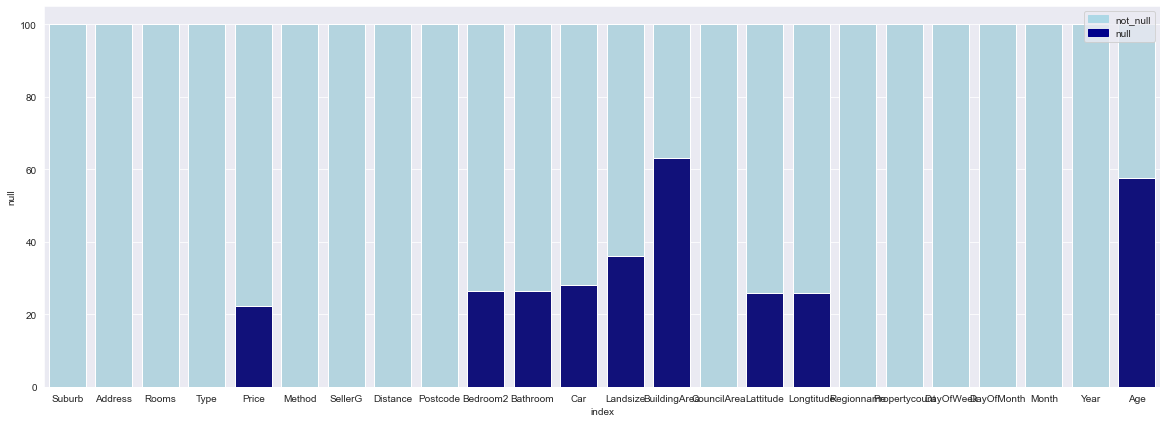

In [96]:
#Plot null data
plt.figure(figsize=(20, 7))

# bar chart 1 -> top bars (null)
bar1 = sns.barplot(x="index",  y='total', data=null_dt, color='lightblue')

# bar chart 2 -> bottom bars (not null)
bar2 = sns.barplot(x="index", y='null', data=null_dt, color='darkblue')

# add legend
top_bar = mpatches.Patch(color='lightblue', label='not_null')
bottom_bar = mpatches.Patch(color='darkblue', label='null')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

In [97]:
# Check unique values => to choose the propriate visualization method for each feature
uniqueValues = data.nunique()
print('Count of unique value sin each column :')
print(uniqueValues)

Count of unique value sin each column :
Suburb             270
Address          28538
Rooms                7
Type                 3
Price             2355
Method               9
SellerG            338
Distance           167
Postcode           156
Bedroom2            10
Bathroom             4
Car                  4
Landsize          1146
BuildingArea       421
CouncilArea         26
Lattitude        10840
Longtitude       11663
Regionname           6
Propertycount      263
DayOfWeek            7
DayOfMonth          30
Month               12
Year                 3
Age                140
dtype: int64


In [98]:
# Drop Bedroom2 and Lattitude
data = data.drop(columns= ['Lattitude', 'Bedroom2'])

In [99]:
data.shape

(29188, 22)

In [100]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,...,BuildingArea,CouncilArea,Longtitude,Regionname,Propertycount,DayOfWeek,DayOfMonth,Month,Year,Age
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2.5,3067,1.0,...,NaN,Yarra City Council,144.9958,Northern Metropolitan,4019.0,Wednesday,9,3,2016,NaN
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067,1.0,...,NaN,Yarra City Council,144.9984,Northern Metropolitan,4019.0,Saturday,12,3,2016,NaN
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067,1.0,...,79.0,Yarra City Council,144.9934,Northern Metropolitan,4019.0,Saturday,2,4,2016,121.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2.5,3067,2.0,...,NaN,Yarra City Council,145.0116,Northern Metropolitan,4019.0,Saturday,2,4,2016,NaN
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067,2.0,...,150.0,Yarra City Council,144.9944,Northern Metropolitan,4019.0,Monday,3,4,2017,121.0


In [101]:
data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Distance         float64
Postcode          object
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
CouncilArea       object
Longtitude       float64
Regionname        object
Propertycount    float64
DayOfWeek         object
DayOfMonth        object
Month             object
Year              object
Age              float64
dtype: object

## Missing values

In [102]:
# Fill null values in Price by 0 then remove columns has price is zero
data['Price'] = data['Price'].fillna(0)
data = data.drop(data[data.Price == 0.0].index)

In [103]:
data.shape

(22680, 22)

In [104]:
null_dt = data.isnull().sum().reset_index()
null_dt.columns = ['index','null']
null_dt['null'] = null_dt['null']/len(data)*100
null_dt

,index,null
0,Suburb,0.000000
1,Address,0.000000
2,Rooms,0.000000
3,Type,0.000000
4,Price,0.000000
5,Method,0.000000
6,SellerG,0.000000
7,Distance,0.004409
8,Postcode,0.004409
9,Bathroom,26.547619


##### Numerical data: Replace null value by mean

In [105]:
data.describe().columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'Longtitude', 'Propertycount', 'Age'],
      dtype='object')

In [106]:
data['Distance'].fillna(data['Distance'].mean(), inplace = True)
data['Bathroom'].fillna(data['Bathroom'].mean(), inplace = True)
data['Car'].fillna(data['Car'].mean(), inplace = True)
data['Landsize'].fillna(data['Landsize'].mean(), inplace = True)
data['BuildingArea'].fillna(data['BuildingArea'].mean(), inplace = True)
data['Age'].fillna(data['Age'].mean(), inplace = True)
data['Longtitude'].fillna(data['Longtitude'].mean(), inplace = True)

null_dt = data.isnull().sum().reset_index()
null_dt.columns = ['index','null']
null_dt['null'] = null_dt['null']/len(data)*100
null_dt

,index,null
0,Suburb,0.000000
1,Address,0.000000
2,Rooms,0.000000
3,Type,0.000000
4,Price,0.000000
5,Method,0.000000
6,SellerG,0.000000
7,Distance,0.000000
8,Postcode,0.004409
9,Bathroom,0.000000


##### Categorical data: Remove null values

In [107]:
null_dt = data.isnull().sum().reset_index()
null_dt.columns = ['index','null']
null_dt['null'] = null_dt['null']/len(data)*100
null_dt

,index,null
0,Suburb,0.000000
1,Address,0.000000
2,Rooms,0.000000
3,Type,0.000000
4,Price,0.000000
5,Method,0.000000
6,SellerG,0.000000
7,Distance,0.000000
8,Postcode,0.004409
9,Bathroom,0.000000


In [108]:
new_data = data.dropna(axis = 0, how ='any')

In [109]:
new_data.shape

(22677, 22)

In [110]:
null_dt_new = new_data.isnull().sum().reset_index()
null_dt_new .columns = ['index','null']
null_dt_new ['null'] = null_dt_new ['null']/len(data)*100
null_dt_new 

,index,null
0,Suburb,0.0
1,Address,0.0
2,Rooms,0.0
3,Type,0.0
4,Price,0.0
5,Method,0.0
6,SellerG,0.0
7,Distance,0.0
8,Postcode,0.0
9,Bathroom,0.0


# FEATURE SELECTION

## Numeric Features

In [111]:
num_col = new_data.select_dtypes(exclude=['object'])
num_col

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Longtitude,Propertycount,Age
1,2,1480000.0,2.5,1.000000,1.000000,202.000000,131.452045,144.99840,4019.0,55.213407
2,2,1035000.0,2.5,1.000000,0.000000,156.000000,79.000000,144.99340,4019.0,121.000000
4,3,1465000.0,2.5,2.000000,0.000000,134.000000,150.000000,144.99440,4019.0,121.000000
5,3,850000.0,2.5,2.000000,1.000000,94.000000,131.452045,144.99690,4019.0,55.213407
6,4,1600000.0,2.5,1.000000,2.000000,120.000000,142.000000,144.99410,4019.0,7.000000
...,...,...,...,...,...,...,...,...,...,...
34852,4,1480000.0,6.3,1.000000,3.000000,593.000000,131.452045,144.88467,6543.0,55.213407
34853,2,888000.0,6.3,2.000000,1.000000,98.000000,104.000000,144.88826,6543.0,3.000000
34854,2,705000.0,6.3,1.000000,2.000000,220.000000,120.000000,144.87856,6543.0,21.000000
34855,3,1140000.0,6.3,1.490606,1.506124,408.842025,131.452045,144.99722,6543.0,55.213407


In [112]:
pd.set_option('display.max_columns', None)
new_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Longtitude,Regionname,Propertycount,DayOfWeek,DayOfMonth,Month,Year,Age
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067,1.0,1.0,202.0,131.452045,Yarra City Council,144.9984,Northern Metropolitan,4019.0,Saturday,12,3,2016,55.213407
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067,1.0,0.0,156.0,79.000000,Yarra City Council,144.9934,Northern Metropolitan,4019.0,Saturday,2,4,2016,121.000000
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067,2.0,0.0,134.0,150.000000,Yarra City Council,144.9944,Northern Metropolitan,4019.0,Monday,3,4,2017,121.000000
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067,2.0,1.0,94.0,131.452045,Yarra City Council,144.9969,Northern Metropolitan,4019.0,Monday,3,4,2017,55.213407
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067,1.0,2.0,120.0,142.000000,Yarra City Council,144.9941,Northern Metropolitan,4019.0,Wednesday,6,4,2016,7.000000


In [113]:
new_data.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Longtitude,Propertycount,Age
count,22677.000000,2.267700e+04,22677.000000,22677.000000,22677.000000,22677.000000,22677.000000,22677.000000,22677.000000,22677.000000
mean,2.870574,9.639135e+05,10.212806,1.490606,1.506124,408.842025,131.452045,144.997220,7499.674560,55.213407
std,0.890581,4.314453e+05,5.040287,0.514016,0.604176,218.285377,33.321986,0.083971,4490.199497,23.302024
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,144.730580,389.000000,3.000000
25%,2.000000,6.400000e+05,6.300000,1.000000,1.000000,297.000000,131.452045,144.957850,4280.000000,55.213407
50%,3.000000,8.650000e+05,10.100000,1.490606,1.506124,408.842025,131.452045,144.997220,6543.000000,55.213407
75%,3.000000,1.235000e+06,13.800000,2.000000,2.000000,538.000000,131.452045,145.039800,10331.000000,55.213407
max,7.000000,2.285000e+06,25.200000,3.000000,3.000000,1324.000000,294.000000,145.267080,21650.000000,152.000000


## Categorical Features

In [114]:
cat_col = new_data.select_dtypes(include=['object'])
cat_col

,Suburb,Address,Type,Method,SellerG,Postcode,CouncilArea,Regionname,DayOfWeek,DayOfMonth,Month,Year
1,Abbotsford,85 Turner St,h,S,Biggin,3067,Yarra City Council,Northern Metropolitan,Saturday,12,3,2016
2,Abbotsford,25 Bloomburg St,h,S,Biggin,3067,Yarra City Council,Northern Metropolitan,Saturday,2,4,2016
4,Abbotsford,5 Charles St,h,SP,Biggin,3067,Yarra City Council,Northern Metropolitan,Monday,3,4,2017
5,Abbotsford,40 Federation La,h,PI,Biggin,3067,Yarra City Council,Northern Metropolitan,Monday,3,4,2017
6,Abbotsford,55a Park St,h,VB,Nelson,3067,Yarra City Council,Northern Metropolitan,Wednesday,6,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,h,PI,Jas,3013,Maribyrnong City Council,Western Metropolitan,Saturday,24,2,2018
34853,Yarraville,29A Murray St,h,SP,Sweeney,3013,Maribyrnong City Council,Western Metropolitan,Saturday,24,2,2018
34854,Yarraville,147A Severn St,t,S,Jas,3013,Maribyrnong City Council,Western Metropolitan,Saturday,24,2,2018
34855,Yarraville,12/37 Stephen St,h,SP,hockingstuart,3013,Maribyrnong City Council,Western Metropolitan,Saturday,24,2,2018


In [115]:
unique_cat_values = cat_col.nunique()
print('Count of unique value sin each column :')
print(unique_cat_values)

Count of unique value sin each column :
Suburb           268
Address        22293
Type               3
Method             5
SellerG          305
Postcode         156
CouncilArea       26
Regionname         6
DayOfWeek          7
DayOfMonth        30
Month             12
Year               3
dtype: int64


- Remove "Address"
- Label Encoder for remain categorical variables


In [116]:
# Remove "Address"
new_data = new_data.drop(columns = ["Address","Suburb","SellerG"])

In [117]:
new_cat_col = new_data.select_dtypes(include=['object']).columns
new_cat_col

Index(['Type', 'Method', 'Postcode', 'CouncilArea', 'Regionname', 'DayOfWeek',
       'DayOfMonth', 'Month', 'Year'],
      dtype='object')

In [118]:
cat_en = ['Type', 'Method', 'Postcode', 'CouncilArea', 'Regionname', 'DayOfWeek',
       'DayOfMonth', 'Month', 'Year']

In [119]:
# a little arbitrary.
low_cardinality_cols = [cname for cname in new_data.columns if 
                                new_data[cname].nunique() < 10 and
                                new_data[cname].dtype == "object"]
numeric_cols = [cname for cname in new_data.columns if 
                                new_data[cname].dtype in ['int64', 'float64']]
my_cols = low_cardinality_cols + numeric_cols
df = new_data[my_cols]

In [120]:
df.head()

,Type,Method,Regionname,DayOfWeek,Year,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Longtitude,Propertycount,Age
1,h,S,Northern Metropolitan,Saturday,2016,2,1480000.0,2.5,1.0,1.0,202.0,131.452045,144.9984,4019.0,55.213407
2,h,S,Northern Metropolitan,Saturday,2016,2,1035000.0,2.5,1.0,0.0,156.0,79.000000,144.9934,4019.0,121.000000
4,h,SP,Northern Metropolitan,Monday,2017,3,1465000.0,2.5,2.0,0.0,134.0,150.000000,144.9944,4019.0,121.000000
5,h,PI,Northern Metropolitan,Monday,2017,3,850000.0,2.5,2.0,1.0,94.0,131.452045,144.9969,4019.0,55.213407
6,h,VB,Northern Metropolitan,Wednesday,2016,4,1600000.0,2.5,1.0,2.0,120.0,142.000000,144.9941,4019.0,7.000000


In [121]:
one_hot_encoded_training_predictors = pd.get_dummies(df)
final_data = one_hot_encoded_training_predictors

In [122]:
final_data.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Longtitude,Propertycount,Age,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,DayOfWeek_Friday,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,Year_2016,Year_2017,Year_2018
1,2,1480000.0,2.5,1.0,1.0,202.0,131.452045,144.9984,4019.0,55.213407,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,2,1035000.0,2.5,1.0,0.0,156.0,79.000000,144.9934,4019.0,121.000000,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,3,1465000.0,2.5,2.0,0.0,134.0,150.000000,144.9944,4019.0,121.000000,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
5,3,850000.0,2.5,2.0,1.0,94.0,131.452045,144.9969,4019.0,55.213407,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
6,4,1600000.0,2.5,1.0,2.0,120.0,142.000000,144.9941,4019.0,7.000000,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0


In [123]:
final_data.shape

(22677, 34)

In [124]:
# Split train test data
y = final_data.Price
X = final_data.drop(columns=['Price'],axis=1)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL SELECTION

## Linear regression

In [125]:
#Create a linear model object
ln = LinearRegression()

# fit the model with the training data
model = ln.fit(X_train,y_train)


# predict the target on the training dataset
y_train_predict = model.predict(X_train)

# Root Mean Squared Error on training dataset
rmse_train = mean_squared_error(y_train,y_train_predict)**(0.5)
print('\nRMSE on train dataset:\t', rmse_train.round(4))

# predict the target on the testing dataset
y_test_predict = model.predict(X_test)

# Root Mean Squared Error on testing dataset
rmse_test = mean_squared_error(y_test,y_test_predict)**(0.5)
print('\nRMSE on test dataset:\t', rmse_test.round(4))

# R_square of model
scoreOfModel_ln = model.score(X, y)
print("Score is calculated as:\t",scoreOfModel_ln.round(4))


RMSE on train dataset:	 259177.0621

RMSE on test dataset:	 265194.8385
Score is calculated as:	 0.6357


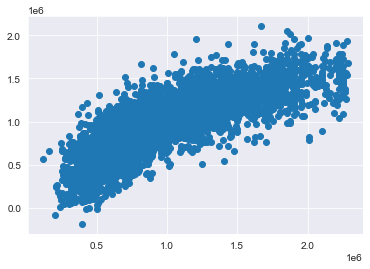

In [126]:
# Plot 
plt.scatter(y_test,y_test_predict)

### Cross Validation

In [127]:
# Apply Cross Validation (KFold)
cv = KFold(n_splits = 10, shuffle = True)
cvt = cross_val_score(model, X, y, cv = cv).round(4)
print("Score is calculated as:\t",cvt.mean().round(4))

Score is calculated as:	 0.6344


<AxesSubplot:xlabel='Price'>

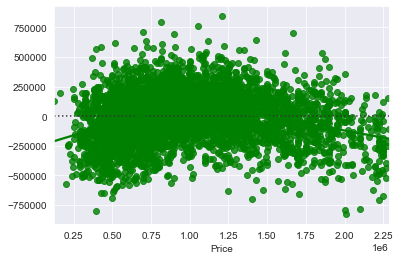

In [128]:
sns.residplot(x = y_test,y = y_test_predict, color = "g", lowess = True)

## Data modeling with PCA

In [129]:
scale = StandardScaler()
normal_X = scale.fit_transform(X)

pca = PCA(n_components = 33)

In [130]:
# Split train test of normal X
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(normal_X, y, test_size = 0.2, random_state=123)

# Apply PCA in train test dataset
X_train_PCA = pca.fit_transform(X_train_PCA)
X_test_PCA = pca.fit_transform(X_test_PCA)

regress_pca = LinearRegression()

#Train model
pca_model = regress_pca.fit(X_train_PCA, y_train_PCA)

y_test_predict_PCA = pca_model.predict(X_test_PCA)
y_train_predict_PCA = pca_model.predict(X_train_PCA)

# Root Mean Squared Error on testing dataset
rmse_test_PCA = mean_squared_error(y_test_PCA,y_test_predict_PCA)**(0.5)
print('\nRMSE on test dataset:\t', rmse_test_PCA.round(4))

# Root Mean Squared Error on training dataset
rmse_train_PCA = mean_squared_error(y_train_PCA,y_train_predict_PCA)**(0.5)
print('\nRMSE on test dataset:\t', rmse_train_PCA.round(4))


# R_square of PCA model
scoreOfModel_pca = pca_model.score(X_train_PCA, y_train_PCA)
print("Score is calculated as:\t",scoreOfModel_pca.round(4))


RMSE on test dataset:	 364272.7446

RMSE on test dataset:	 260650.6923
Score is calculated as:	 0.6342


Text(0, 0.5, 'cucumlative explain variance')

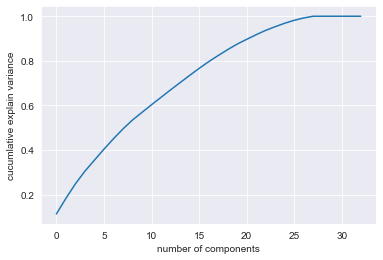

In [131]:
# Plot to check the best number of component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cucumlative explain variance')

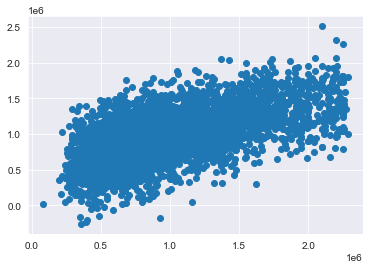

In [132]:
# Plot 
plt.scatter(y_test_PCA,y_test_predict_PCA)

In [133]:
# Apply Cross Validation (KFold)
cvt_pca = cross_val_score(pca_model, normal_X, y, cv = cv).round(4)
print("Score is calculated as:\t",cvt_pca.mean().round(4))

Score is calculated as:	 0.6346


<AxesSubplot:xlabel='Price'>

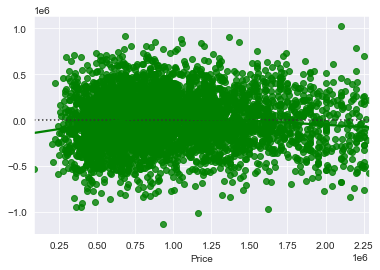

In [134]:
sns.residplot(x = y_test_PCA,y = y_test_predict_PCA, color = "g", lowess = True)

# Model Comparision

In [135]:
from sklearn.model_selection import cross_validate
model_noPCA = [('model_nopca', model)]
model_PCA = [('mode_pca', pca_model)]

scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

results = []
metric = []
for name, model in model_noPCA:
    for i in scoring:
        scores = cross_validate(model, X_train, y_train, scoring = i, cv = 10, return_train_score=True)
        results.append(scores)
for name, model in model_PCA:
    for i in scoring:
        scores = cross_validate(model, X_train_PCA, y_train_PCA, scoring = i, cv=10,return_train_score=True)
        results.append(scores)

In [136]:
 results

[{'fit_time': array([0.01030803, 0.01343489, 0.01327324, 0.01075196, 0.01158404,
         0.00832891, 0.00778604, 0.00787401, 0.00769591, 0.00769401]),
  'score_time': array([0.00179887, 0.00166607, 0.00166082, 0.00170803, 0.00244212,
         0.00162983, 0.00159478, 0.00159526, 0.00157309, 0.00156403]),
  'test_score': array([-6.85951475e+10, -6.74672059e+10, -7.03675506e+10, -6.84091038e+10,
         -6.09965504e+10, -6.89931128e+10, -6.62163395e+10, -6.75071839e+10,
         -7.06166194e+10, -6.44998073e+10]),
  'train_score': array([-6.70264007e+10, -6.71476069e+10, -6.68289983e+10, -6.70436670e+10,
         -6.78733136e+10, -6.69817869e+10, -6.72902230e+10, -6.71482431e+10,
         -6.68026692e+10, -6.74825125e+10])},
 {'fit_time': array([0.00790381, 0.00750589, 0.0077219 , 0.00790811, 0.00763369,
         0.00752401, 0.00754309, 0.00772405, 0.00761795, 0.00750589]),
  'score_time': array([0.00163102, 0.00160217, 0.00167513, 0.00154591, 0.00159121,
         0.00158405, 0.00155997

In [137]:
# Linear model without applying PCA
LR_rmse_mean = np.sqrt(-results[0]['test_score'].mean())
LR_rmse_std = results[0]['test_score'].std()

LR_mae_mean = -results[1]['test_score'].mean()
LR_mae_std = results[1]['test_score'].std()

LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

# Linear model with PCA
PCA_LR_rmse_mean = np.sqrt(-results[3]['test_score'].mean())
PCA_LR_rmse_std = results[3]['test_score'].std()

PCA_LR_mae_mean = -results[4]['test_score'].mean()
PCA_LR_mae_std = results[4]['test_score'].std()

PCA_LR_r2_mean = results[5]['test_score'].mean()
PCA_LR_r2_std = results[5]['test_score'].std()



In [138]:
model_LR = pd.DataFrame({
    'model': ['model_nopca','model_pca'],
    'RMSE_mean': [LR_rmse_mean, PCA_LR_rmse_mean],
    'RMSE_std': [LR_rmse_std, PCA_LR_rmse_std ],
    'MAE_mean': [LR_mae_mean,PCA_LR_mae_mean],
    'MAE_std': [LR_mae_std, PCA_LR_mae_std],
    'R_square_mean': [LR_r2_mean, PCA_LR_r2_mean],
    'R_square_std':[LR_r2_std,PCA_LR_r2_std]
}, columns = ['model','RMSE_mean','RMSE_std','MAE_mean','MAE_std','R_square_mean','R_square_std'])
 
model_LR.sort_values(by='R_square_mean', ascending = False )

,model,RMSE_mean,RMSE_std,MAE_mean,MAE_std,R_square_mean,R_square_std
0,model_nopca,259551.270642,2.737865e+09,199713.948490,3023.225358,0.636931,0.011145
1,model_pca,261114.824560,2.922103e+09,200947.925823,4601.632206,0.632721,0.013534


## HYPERPARAMETER TUNING

## Gridserch CV

In [139]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=5)
grid.fit(X_train, y_train)
print ("r2 / variance : ", grid.best_score_)

r2 / variance :  0.637080960703815


In [140]:
# coefficeints of the trained model
print('\nCoefficient of model :', model.coef_)

# intercept of the model
print('\nIntercept of model',model.intercept_)


Coefficient of model : [ 9.23948333e+04  5.26749200e+04  4.36408396e+04 -2.31878229e+04
  3.86401266e+04 -9.14035563e+04  1.07017617e+04 -7.76608744e+04
  1.21410094e+05 -3.17576199e+03  7.01776040e+03  1.25229975e+04
 -5.58727851e+04  1.74906819e+04 -7.23641438e+04  1.79889344e+04
 -4.87495818e+04 -2.47684397e+04  2.17024275e+03  4.89250413e+04
  3.22456389e+03  2.88548230e+03  3.94800947e+04  1.11739828e+04
 -4.11395590e+04  1.15273409e+05  1.45683469e+05  4.22389408e+04
 -2.83987358e+17 -4.37813844e+17  2.58842644e+16 -4.80707768e+15
  3.84219550e+14]

Intercept of model 963934.4485825797
